In [1]:
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import Functional_Fusion.util as ut
import nibabel as nb
import nilearn.plotting as nlp
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib.gridspec import GridSpec
import nitools as nt

In [2]:
# base_dir = ut.get_base_dir()


In [3]:
dn,ainf = am.get_atlas('MNISymDentate1')
# dat,dinf,_ = ds.get_dataset(base_dir,'Language',atlas='MNISymDentate1', sess='ses-localizer',subj=[1],type='cond_fm_CondRun')

In [4]:
adir = ut.default_atlas_dir
bg_img1 = nb.load(adir + '/tpl-MNI152NLin2009cSym/tpl-MNI152NLin2009cSym_res-1_dentate.nii')
bg_img2 = nb.load(adir + '/tpl-MNI152NLin2009cSymC/tpl-MNI152NLin2009cSymC_T1w.nii')
# Project the functional data into the atlas space
fcn_img = dn.data_to_nifti(np.random.normal(size=(dn.P,)))

In [12]:
# Cut out the voxel correct coordinates
c1 = np.array([-32,-70,-43]).reshape((3,1)) # Lower left corner of image
c2 = np.array([32,-40,-20]).reshape((3,1)) # Upper right corner of image
# transform these into voxel coordinates
v1 = nt.affine_transform_mat(c1,inv(bg_img1.affine)).astype(int).squeeze()
v2 = nt.affine_transform_mat(c2,inv(bg_img1.affine)).astype(int).squeeze()
w1 = nt.affine_transform_mat(c1,inv(bg_img2.affine)).astype(int).squeeze()
w2 = nt.affine_transform_mat(c2,inv(bg_img2.affine)).astype(int).squeeze()

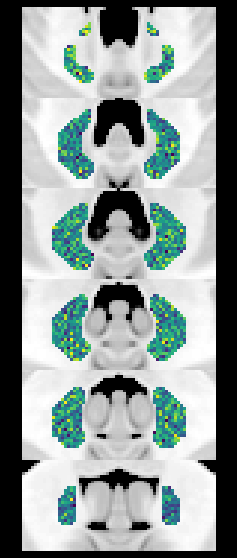

In [20]:
bg1 = bg_img1.slicer[v1[0]:v2[0]+1,v1[1]:v2[1]+1,v1[2]:v2[2]+1]
bg2 = bg_img2.slicer[w1[0]:w2[0]+1,w1[1]:w2[1]+1,w1[2]:w2[2]+1]
fc = fcn_img.slicer[v1[0]:v2[0]+1,v1[1]:v2[1]+1,v1[2]:v2[2]+1]

fig = plt.figure(figsize=(4,10),facecolor='black')
gs = GridSpec(6, 1,fig,hspace=0)
z_coords = [-31,-33,-35,-37,-39,-42]
for j,z in enumerate(z_coords):
    ax = fig.add_subplot(gs[j,0])
    nlp.plot_img(fc,
        display_mode="z",
        threshold=0,
        cut_coords=[z],
        bg_img=bg2,
        black_bg=True,
        axes=ax,
        annotate=False)


In [11]:
bg2.shape

(1, 1, 1)

In [ ]:
np.nanmax(fc.get_fdata())

In [23]:
bg_img1 = nb.load(adir + '/tpl-MNI152NLin2009cSym/tpl-MNI152NLin2009cSym_res-1_dentate.nii')
bg_img2 = nb.load(adir + '/tpl-MNI152NLin2009cSymC/tpl-MNI152NLin2009cSymC_T1w.nii')
# Project the functional data into the atlas space
fcn_img = dn.data_to_nifti(np.random.normal(size=(dn.P,)))

# Cut out the voxel correct coordinates
c1 = np.array([[-25,-70,-43],[7,-70,-43]]).T # Lower left corner of image
c2 = np.array([[-7,-40,-20],[25,-40,-20]]).T # Upper right corner of image
v1 = nt.affine_transform_mat(c1,inv(bg_img1.affine)).astype(int)
v2 = nt.affine_transform_mat(c2,inv(bg_img1.affine)).astype(int)
w1 = nt.affine_transform_mat(c1,inv(bg_img2.affine)).astype(int)
w2 = nt.affine_transform_mat(c2,inv(bg_img2.affine)).astype(int)
# Cut out left and right dentate
bg1 = []
bg2 = []
fc = []

for i in range(2):
    bg1.append(bg_img1.slicer[v1[0,i]:v2[0,i]+1,v1[1,i]:v2[1,i]+1,v1[2,i]:v2[2,i]+1])
    bg2.append(bg_img2.slicer[w1[0,i]:w2[0,i]+1,w1[1,i]:w2[1,i]+1,w1[2,i]:w2[2,i]+1])
    fc.append(fcn_img.slicer[v1[0,i]:v2[0,i]+1,v1[1,i]:v2[1,i]+1,v1[2,i]:v2[2,i]+1])


In [ ]:
fc[1].shape

/opt/miniconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:238: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)


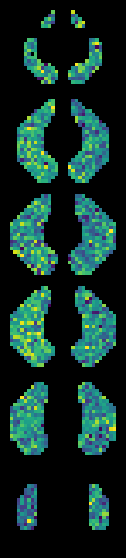

In [29]:

fig = plt.figure(figsize=(2,10),facecolor='black')
gs = GridSpec(6, 2,hspace=0.1,wspace=0.1)
z_coords = [-31,-33,-35,-37,-39,-42]
for i in range(2):
    for j,z in enumerate(z_coords):
        ax = fig.add_subplot(gs[j,i])
        nlp.plot_img(fc[i],
            display_mode="z",
            threshold=0.001,
            cut_coords=[z],
            black_bg=True,
            axes=ax,
            annotate=False)
